In [1]:
import collections
import warnings

# Our numerical workhorses
import numpy as np
import pandas as pd
import scipy.optimize
import scipy.stats as st

# Numba to make things faster
import numba

# The MCMC Hammer
import emcee

# Numerical differentiation package
import numdifftools as ndt

# Import plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
import corner

import matplotlib.patheffects as path_effects

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables high res graphics inline (only use with static plots (non-Bokeh))
# SVG is preferred, but there is a bug in Jupyter with vertical lines
%config InlineBackend.figure_formats = {'png', 'retina'}


# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2,
      'axes.labelsize': 18,
      'axes.titlesize': 18,
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import datetime as dt


In [111]:
input_path = '../input/rnai_screen_results/'
output_path = '../output/rnai_screen_results/'
graph_path = '../output/raw_brood_assay_plots/'

df = pd.read_csv(input_path + 'lawn_leaving_assays.csv', sep=',')
names = pd.read_csv(input_path + 'rnai_genes_dict.csv')

df.strain = df.strain.apply(str)
df.strain = df.strain.apply(str.lower)
df.strain = df.strain.apply(str.strip)

names.code = names.code.apply(str)
names.code = names.code.apply(str.lower)

df.drop(df.index[df.censor == 1], inplace=True)
# df.dropna(axis=0, inplace=True)


In [112]:
df['p_l'] = df.off_lawn_worms/(df.off_lawn_worms+df.lawn_worms)

In [113]:
def translate(x):
    """A function to go between rnai code and gene (human-readable) name."""
    if len(names[names.code == x].gene_name.values):
        return names[names.code == x].gene_name.values[0]
    else:
        return 'badcode'

df['gene'] = df.strain.apply(translate)

(0, 1)

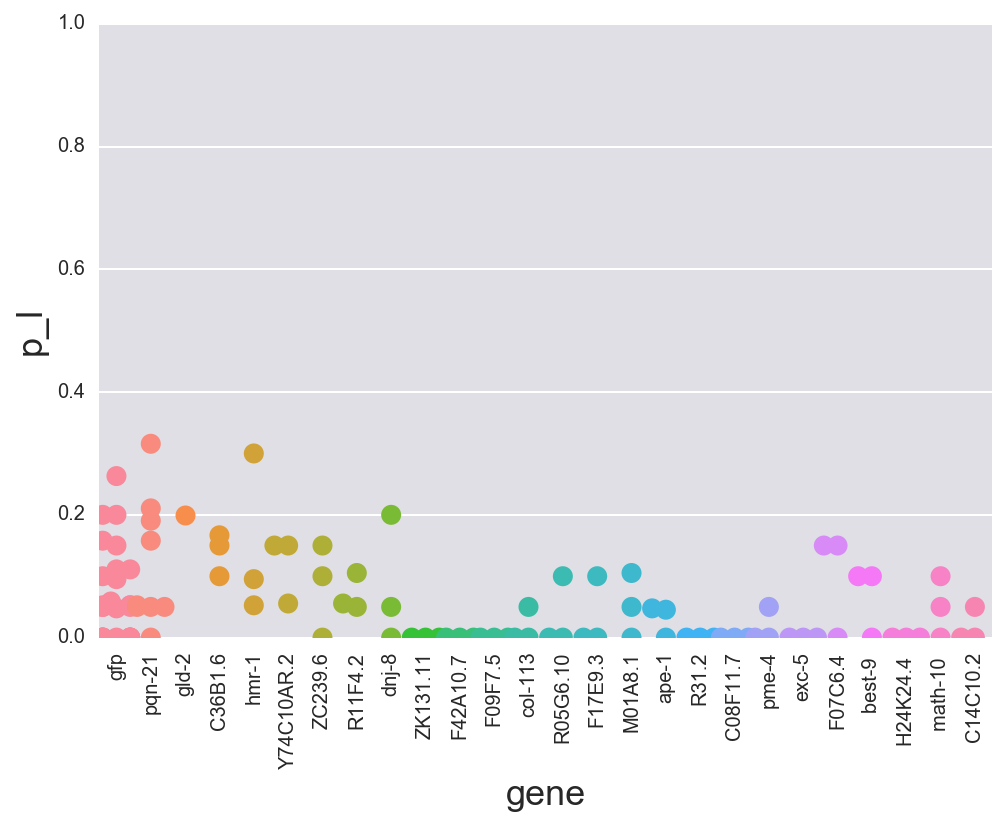

In [114]:
sns.swarmplot('gene','p_l', data=df, size=10)
plt.xticks(rotation=90)
plt.ylim(0, 1)

/Users/dangeles/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


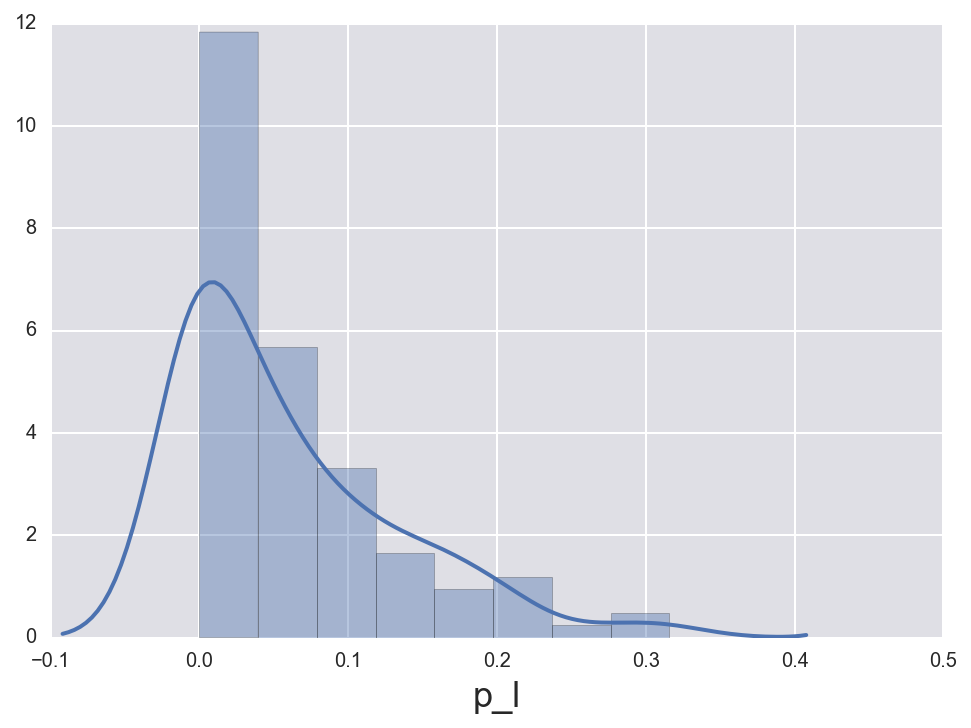

In [120]:
sns.distplot(df.p_l.dropna())

In [135]:
def fano(x):
    ind = df.gene == x
    mu = df[ind].p_l.mean()
    var = df[ind].p_l.var()
    return var / (mu + 0.0001)

def decay(x):
    ind = df.gene == x
    mu = df[ind].p_l.mean()
    std = df[ind].p_l.std()
    return std / (mu + 0.0001)

df['fano'] = df.gene.apply(fano)
df['std'] = df.gene.apply(decay)

/Users/dangeles/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


0.0643875093897208
0.07351025896622482
0.004145751365411385


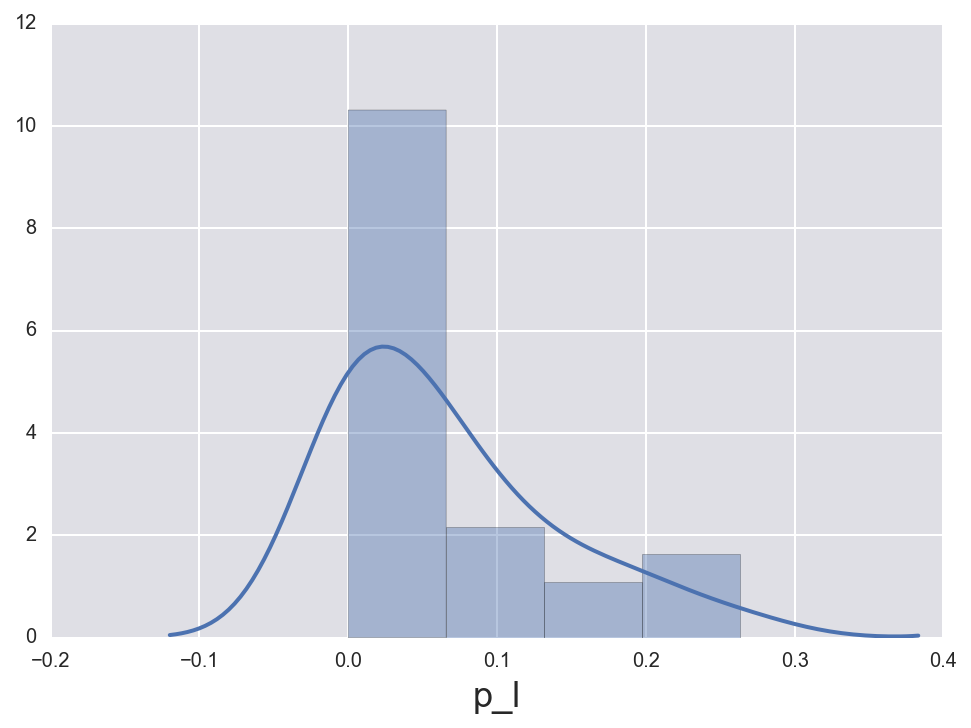

In [128]:
sns.distplot(df[df.gene=='gfp'].p_l)
print(df[df.gene == 'gfp'].p_l.mean())
print(df[df.gene == 'gfp'].p_l.std())
print(df[df.gene == 'gfp'].p_l.mean()**2)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

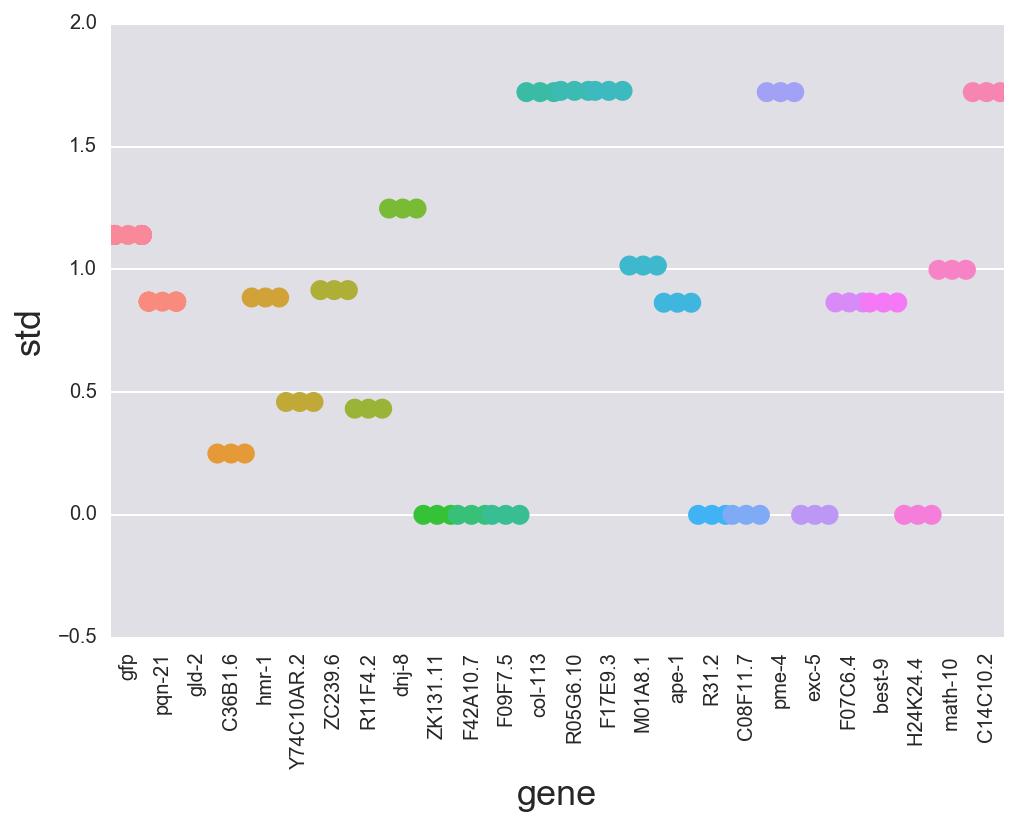

In [137]:
sns.swarmplot('gene', 'std', data=df, size=10)
plt.xticks(rotation=90)
# plt.ylim(0, 1)